In [1]:

from google.colab import drive
drive.mount('/content/drive')
import os

#ROOT_PATH = "/content/drive/MyDrive/EPFL/optMLProject_Nicolas²_Oliver/" # Nicolas P.
#ROOT_PATH = "/content/drive/MyDrive/optMLProject_Nicolas²_Oliver/" # Nicolas B.
ROOT_PATH = "/content/drive/MyDrive/eigeneoptml" # Oliver D.

print(os.listdir(ROOT_PATH))


Mounted at /content/drive
['README.md', 'Hyperparameters Search.docx', 'more_info_hyperparameters_search.xlsx', 'hyperparameters_search.xlsx', 'optML.ipynb', 'data', 'utils', 'SGD_resnet18.txt', 'SGDM_resnet18.txt', 'RMS_resnet18.txt', 'ADAM_resnet18.txt', 'LION_resnet18.txt', 'SGD_resnet101.txt', 'SGDM_resnet101.txt', 'RMS_resnet101.txt', 'ADAM_resnet101.txt', 'LION_resnet101.txt', 'optML_evaluation.ipynb']


In [4]:
%load_ext autoreload
%autoreload 2

#Imports

import sys
sys.path.append(ROOT_PATH)

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

!pip install Lion_pytorch
from lion_pytorch import Lion

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


from utils import constants as cst
from utils import auxiliaries as aux

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
'''
Load testing and training data
'''
training_set, test_set = aux.get_dataset()

training_loader = torch.utils.data.DataLoader(
    training_set, batch_size=cst.TRAIN_BATCH_SIZE
)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=cst.TEST_BATCH_SIZE
)


Files already downloaded and verified
Files already downloaded and verified


### ResNet18 Model

In [6]:
'''
SGD
'''
hyperparams = {
    'lr' : 0.01,
    'weight_decay' : 0.005
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'SGD', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'SGD_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.27it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.48it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.44it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:24<00:00,  7.85it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.73it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.66it/s]


Training Loss: [4.8261336326599125, 4.775549030303955, 4.728744602203369, 4.703680324554443, 4.658866596221924, 4.6536760330200195, 4.608709144592285, 4.597919845581055, 4.564447212219238, 4.577810668945313, 4.541335868835449, 4.508684158325195, 4.470334529876709, 4.452142715454102, 4.461726093292237, 4.406626892089844, 4.381813907623291, 4.378751182556153, 4.340117454528809, 4.334754753112793, 4.288783550262451, 4.28412446975708, 4.261755084991455, 4.235495948791504, 4.2225977897644045, 4.208098888397217, 4.224838161468506, 4.19013147354126, 4.1517126083374025, 4.180936431884765, 4.195838928222656, 4.166929817199707, 4.091862773895263, 4.101819896697998, 4.11502857208252, 4.110314750671387, 4.110002517700195, 4.110105705261231, 4.07613582611084, 4.070703029632568, 4.0205176830291744, 4.050003862380981, 4.063342952728272, 4.031293249130249, 4.019896841049194, 3.9872416973114015, 3.966284465789795, 3.9355637550354006, 3.987871265411377, 3.9374715805053713, 3.9829568386077883, 3.98038387

Testing: 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


Training Loss Array: [4.8261336326599125, 4.775549030303955, 4.728744602203369, 4.703680324554443, 4.658866596221924, 4.6536760330200195, 4.608709144592285, 4.597919845581055, 4.564447212219238, 4.577810668945313, 4.541335868835449, 4.508684158325195, 4.470334529876709, 4.452142715454102, 4.461726093292237, 4.406626892089844, 4.381813907623291, 4.378751182556153, 4.340117454528809, 4.334754753112793, 4.288783550262451, 4.28412446975708, 4.261755084991455, 4.235495948791504, 4.2225977897644045, 4.208098888397217, 4.224838161468506, 4.19013147354126, 4.1517126083374025, 4.180936431884765, 4.195838928222656, 4.166929817199707, 4.091862773895263, 4.101819896697998, 4.11502857208252, 4.110314750671387, 4.110002517700195, 4.110105705261231, 4.07613582611084, 4.070703029632568, 4.0205176830291744, 4.050003862380981, 4.063342952728272, 4.031293249130249, 4.019896841049194, 3.9872416973114015, 3.966284465789795, 3.9355637550354006, 3.987871265411377, 3.9374715805053713, 3.9829568386077883, 3.98

In [7]:
'''
SGDM
'''
hyperparams = {
    'lr' : 0.01,
    'weight_decay' : 0.005,
    'momentum' : 0.9
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'SGDM', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'SGDM_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.65it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.65it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.41it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.48it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.52it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


Training Loss: [4.825887203216553, 4.716072845458984, 4.601830673217774, 4.500523281097412, 4.421042156219483, 4.336086082458496, 4.233717060089111, 4.2062629699707035, 4.130711460113526, 4.095574855804443, 4.053017568588257, 4.079514122009277, 4.085797691345215, 3.9838539123535157, 4.052084589004517, 3.9609686851501467, 3.8944617748260497, 3.944622755050659, 3.9225205898284914, 3.8194445610046386, 3.805210828781128, 3.7356127738952636, 3.8144864559173586, 3.6877694606781004, 3.7086244583129884, 3.704555368423462, 3.7190389156341555, 3.6599432945251467, 3.632186269760132, 3.647515058517456, 3.687197208404541, 3.637122869491577, 3.5800425529479982, 3.591925287246704, 3.5946487903594972, 3.598131275177002, 3.582494926452637, 3.5212485790252686, 3.501228857040405, 3.5915642261505125, 3.4950380325317383, 3.536638593673706, 3.527915334701538, 3.478949213027954, 3.5254254817962645, 3.4544183731079103, 3.456059217453003, 3.3963935375213623, 3.416315126419067, 3.401760387420654, 3.388537979125

Testing: 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]


Training Loss Array: [4.825887203216553, 4.716072845458984, 4.601830673217774, 4.500523281097412, 4.421042156219483, 4.336086082458496, 4.233717060089111, 4.2062629699707035, 4.130711460113526, 4.095574855804443, 4.053017568588257, 4.079514122009277, 4.085797691345215, 3.9838539123535157, 4.052084589004517, 3.9609686851501467, 3.8944617748260497, 3.944622755050659, 3.9225205898284914, 3.8194445610046386, 3.805210828781128, 3.7356127738952636, 3.8144864559173586, 3.6877694606781004, 3.7086244583129884, 3.704555368423462, 3.7190389156341555, 3.6599432945251467, 3.632186269760132, 3.647515058517456, 3.687197208404541, 3.637122869491577, 3.5800425529479982, 3.591925287246704, 3.5946487903594972, 3.598131275177002, 3.582494926452637, 3.5212485790252686, 3.501228857040405, 3.5915642261505125, 3.4950380325317383, 3.536638593673706, 3.527915334701538, 3.478949213027954, 3.5254254817962645, 3.4544183731079103, 3.456059217453003, 3.3963935375213623, 3.416315126419067, 3.401760387420654, 3.388537

In [8]:
'''
RMS
'''
hyperparams = {
    'lr' : 0.0001,
    'weight_decay' : 1e-05,
    'momentum' : 0.9
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'RMS', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'RMS_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.46it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.46it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.45it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.71it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.58it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.54it/s]


Training Loss: [4.768096542358398, 4.690402030944824, 4.451647090911865, 4.288861083984375, 4.214138603210449, 4.160963249206543, 4.069072532653808, 3.970396137237549, 3.971084213256836, 3.9316752433776854, 3.926130771636963, 3.903763008117676, 3.9530029296875, 3.8602675437927245, 3.879940700531006, 3.7541365146636965, 3.712843990325928, 3.7869555950164795, 3.7828112125396727, 3.6322800159454345, 3.6692542552948, 3.568409061431885, 3.6871453762054442, 3.5792837619781492, 3.5837207794189454, 3.5584027767181396, 3.603707265853882, 3.5457644939422606, 3.513389730453491, 3.5112677574157716, 3.5488233089447023, 3.5435086727142333, 3.4405000686645506, 3.5072110176086424, 3.483854055404663, 3.47214822769165, 3.4589611530303954, 3.4415070056915282, 3.3694855213165282, 3.4073042392730715, 3.3913986682891846, 3.379276466369629, 3.4315490245819094, 3.3931555271148683, 3.3744131565093993, 3.324880504608154, 3.3029016494750976, 3.236514139175415, 3.2658947944641112, 3.248957872390747, 3.23749456405

Testing: 100%|██████████| 10/10 [00:03<00:00,  2.99it/s]


Training Loss Array: [4.768096542358398, 4.690402030944824, 4.451647090911865, 4.288861083984375, 4.214138603210449, 4.160963249206543, 4.069072532653808, 3.970396137237549, 3.971084213256836, 3.9316752433776854, 3.926130771636963, 3.903763008117676, 3.9530029296875, 3.8602675437927245, 3.879940700531006, 3.7541365146636965, 3.712843990325928, 3.7869555950164795, 3.7828112125396727, 3.6322800159454345, 3.6692542552948, 3.568409061431885, 3.6871453762054442, 3.5792837619781492, 3.5837207794189454, 3.5584027767181396, 3.603707265853882, 3.5457644939422606, 3.513389730453491, 3.5112677574157716, 3.5488233089447023, 3.5435086727142333, 3.4405000686645506, 3.5072110176086424, 3.483854055404663, 3.47214822769165, 3.4589611530303954, 3.4415070056915282, 3.3694855213165282, 3.4073042392730715, 3.3913986682891846, 3.379276466369629, 3.4315490245819094, 3.3931555271148683, 3.3744131565093993, 3.324880504608154, 3.3029016494750976, 3.236514139175415, 3.2658947944641112, 3.248957872390747, 3.23749

In [9]:
'''
ADAM
'''
hyperparams = {
    'lr' : 0.0003,
    'weight_decay' : 0.1
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'ADAM', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'ADAM_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.69it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.54it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.47it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.48it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.47it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.54it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.47it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.48it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


Training Loss: [4.796074485778808, 4.624934101104737, 4.525672245025635, 4.457954978942871, 4.321028041839599, 4.275973892211914, 4.195884704589844, 4.141361236572266, 4.09122953414917, 4.06908483505249, 4.014222621917725, 4.027204751968384, 4.00996036529541, 3.8827969074249267, 3.947089958190918, 3.871000289916992, 3.788445568084717, 3.8733587741851805, 3.8390083789825438, 3.753052520751953, 3.7398541927337647, 3.6215263843536376, 3.720983934402466, 3.658420753479004, 3.649995803833008, 3.6263012886047363, 3.705709218978882, 3.65533652305603, 3.5919326305389405, 3.6173206329345704, 3.64830322265625, 3.623246097564697, 3.575961637496948, 3.555141830444336, 3.5832895278930663, 3.569045877456665, 3.5123462200164797, 3.6079904556274416, 3.4803531169891357, 3.552460765838623, 3.5281915187835695, 3.5307363510131835, 3.5335882663726808, 3.5109735488891602, 3.49566388130188, 3.4940927505493162, 3.418301248550415, 3.418061923980713, 3.464137315750122, 3.4638650894165037, 3.4248744010925294, 3.

Testing: 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]


Training Loss Array: [4.796074485778808, 4.624934101104737, 4.525672245025635, 4.457954978942871, 4.321028041839599, 4.275973892211914, 4.195884704589844, 4.141361236572266, 4.09122953414917, 4.06908483505249, 4.014222621917725, 4.027204751968384, 4.00996036529541, 3.8827969074249267, 3.947089958190918, 3.871000289916992, 3.788445568084717, 3.8733587741851805, 3.8390083789825438, 3.753052520751953, 3.7398541927337647, 3.6215263843536376, 3.720983934402466, 3.658420753479004, 3.649995803833008, 3.6263012886047363, 3.705709218978882, 3.65533652305603, 3.5919326305389405, 3.6173206329345704, 3.64830322265625, 3.623246097564697, 3.575961637496948, 3.555141830444336, 3.5832895278930663, 3.569045877456665, 3.5123462200164797, 3.6079904556274416, 3.4803531169891357, 3.552460765838623, 3.5281915187835695, 3.5307363510131835, 3.5335882663726808, 3.5109735488891602, 3.49566388130188, 3.4940927505493162, 3.418301248550415, 3.418061923980713, 3.464137315750122, 3.4638650894165037, 3.42487440109252

In [10]:
'''
LION
'''
hyperparams = {
    'lr' : 0.0003,
    'weight_decay' : 1
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'LION', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'LION_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.65it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.58it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:24<00:00,  7.85it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.78it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.63it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.73it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.74it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.66it/s]


Training Loss: [4.798904323577881, 4.607520198822021, 4.483556175231934, 4.390538311004638, 4.235032367706299, 4.166542053222656, 4.067856216430664, 4.0136534690856935, 3.9000629425048827, 3.917862129211426, 3.8440856456756594, 3.8325525760650634, 3.8358384132385255, 3.697729158401489, 3.7918874740600588, 3.689948081970215, 3.662405586242676, 3.713893175125122, 3.7143829345703123, 3.5488014698028563, 3.6078844547271727, 3.538510036468506, 3.5681439876556396, 3.507354211807251, 3.487568712234497, 3.4868564128875734, 3.5220097064971925, 3.4922070503234863, 3.4323858261108398, 3.4536977291107176, 3.4965796947479246, 3.4208241939544677, 3.368169593811035, 3.427535629272461, 3.3808577060699463, 3.3633203983306883, 3.3281171798706053, 3.3606636047363283, 3.326985311508179, 3.35968279838562, 3.2873990535736084, 3.2960702896118166, 3.3120960235595702, 3.2573298454284667, 3.285295867919922, 3.280653238296509, 3.1840592861175536, 3.1769876956939695, 3.200143909454346, 3.189448881149292, 3.221804

Testing: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]


Training Loss Array: [4.798904323577881, 4.607520198822021, 4.483556175231934, 4.390538311004638, 4.235032367706299, 4.166542053222656, 4.067856216430664, 4.0136534690856935, 3.9000629425048827, 3.917862129211426, 3.8440856456756594, 3.8325525760650634, 3.8358384132385255, 3.697729158401489, 3.7918874740600588, 3.689948081970215, 3.662405586242676, 3.713893175125122, 3.7143829345703123, 3.5488014698028563, 3.6078844547271727, 3.538510036468506, 3.5681439876556396, 3.507354211807251, 3.487568712234497, 3.4868564128875734, 3.5220097064971925, 3.4922070503234863, 3.4323858261108398, 3.4536977291107176, 3.4965796947479246, 3.4208241939544677, 3.368169593811035, 3.427535629272461, 3.3808577060699463, 3.3633203983306883, 3.3281171798706053, 3.3606636047363283, 3.326985311508179, 3.35968279838562, 3.2873990535736084, 3.2960702896118166, 3.3120960235595702, 3.2573298454284667, 3.285295867919922, 3.280653238296509, 3.1840592861175536, 3.1769876956939695, 3.200143909454346, 3.189448881149292, 3.

## Evaluation of ResNet18

In [11]:
#load SGD Data
SGD_results = aux.load_results('SGD_resnet18', ROOT_PATH)
SGDM_results = aux.load_results('SGDM_resnet18', ROOT_PATH)
RMS_results = aux.load_results('RMS_resnet18', ROOT_PATH)
ADAM_results = aux.load_results('ADAM_resnet18', ROOT_PATH)
LION_results = aux.load_results('LION_resnet18', ROOT_PATH)

results18 = [SGD_results, SGDM_results, RMS_results, ADAM_results, LION_results]
optimizers = ['SGD','SGDM','RMS','ADAM','LION']

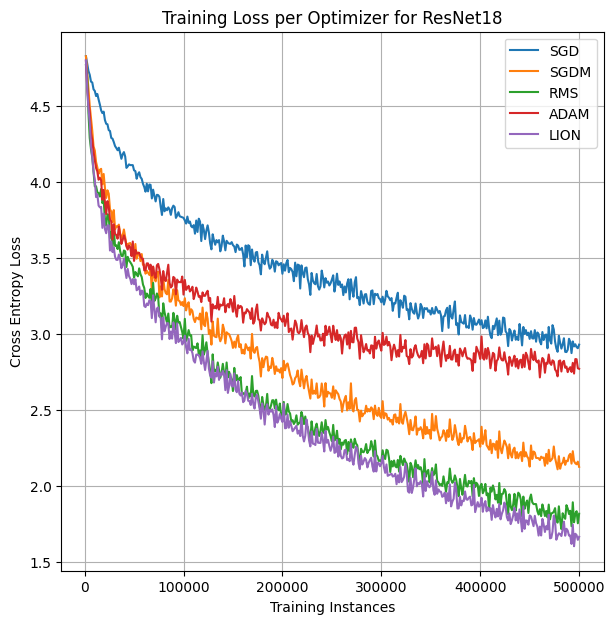

In [12]:
#Plot the training loss for each optimizer
fig, axs = plt.subplots(figsize=(7,7))
[axs.plot(a['trained_examples'], a['train_loss']) for a in results18]
axs.legend(optimizers)
axs.set_xlabel('Training Instances')
axs.set_ylabel('Cross Entropy Loss')
axs.grid()
axs.set_title("Training Loss per Optimizer for ResNet18")
fig.show()

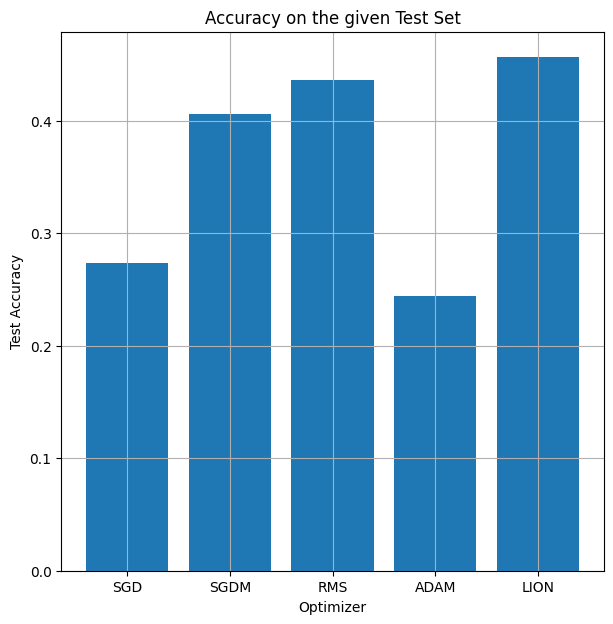

In [13]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(x=optimizers, height=[a['acc'] for a in results18])
axs.set_xlabel('Optimizer')
axs.set_ylabel('Test Accuracy')
axs.grid()
axs.set_title("Accuracy on the given Test Set")
fig.show()

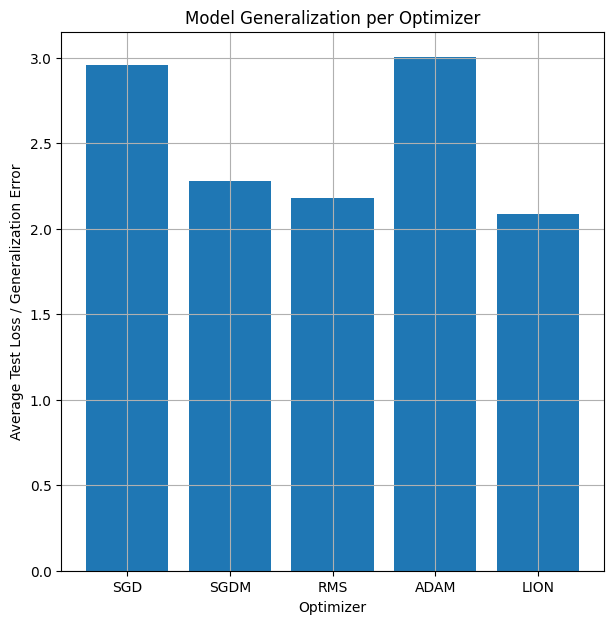

In [14]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(x=optimizers, height=[a['test_loss'] for a in results18])
axs.set_xlabel('Optimizer')
axs.set_ylabel('Average Test Loss / Generalization Error')
axs.grid()
axs.set_title("Generalization Error per Optimizer")
fig.show()

## ResNet101 Model

In [15]:
'''
SGD
'''
hyperparams = {
    'lr' : 0.01,
    'weight_decay' : 0.05
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'SGD', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'SGD_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.42it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.43it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:39<00:00,  4.98it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.46it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.37it/s]


Training Loss: [4.918828392028809, 4.820326900482177, 4.772532176971436, 4.714852523803711, 4.743791103363037, 4.7330653190612795, 4.691277599334716, 4.681407928466797, 4.725086784362793, 4.709003543853759, 4.720925807952881, 4.697709369659424, 4.6502961158752445, 4.670232963562012, 4.667822933197021, 4.684797382354736, 4.681886959075928, 4.677438354492187, 4.642309093475342, 4.61853666305542, 4.615262889862061, 4.625432682037354, 4.608672142028809, 4.596147155761718, 4.601729774475098, 4.590933418273925, 4.570468902587891, 4.5943502426147464, 4.597984313964844, 4.577130889892578, 4.578187561035156, 4.599068450927734, 4.544536304473877, 4.529751396179199, 4.573914909362793, 4.568796157836914, 4.52459192276001, 4.500913524627686, 4.535801982879638, 4.5244447708129885, 4.524882793426514, 4.530781078338623, 4.501096248626709, 4.511341285705567, 4.496765518188477, 4.4719157218933105, 4.467146205902099, 4.44292049407959, 4.465248680114746, 4.488965129852295, 4.478610515594482, 4.44070386886

Testing: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


Training Loss Array: [4.918828392028809, 4.820326900482177, 4.772532176971436, 4.714852523803711, 4.743791103363037, 4.7330653190612795, 4.691277599334716, 4.681407928466797, 4.725086784362793, 4.709003543853759, 4.720925807952881, 4.697709369659424, 4.6502961158752445, 4.670232963562012, 4.667822933197021, 4.684797382354736, 4.681886959075928, 4.677438354492187, 4.642309093475342, 4.61853666305542, 4.615262889862061, 4.625432682037354, 4.608672142028809, 4.596147155761718, 4.601729774475098, 4.590933418273925, 4.570468902587891, 4.5943502426147464, 4.597984313964844, 4.577130889892578, 4.578187561035156, 4.599068450927734, 4.544536304473877, 4.529751396179199, 4.573914909362793, 4.568796157836914, 4.52459192276001, 4.500913524627686, 4.535801982879638, 4.5244447708129885, 4.524882793426514, 4.530781078338623, 4.501096248626709, 4.511341285705567, 4.496765518188477, 4.4719157218933105, 4.467146205902099, 4.44292049407959, 4.465248680114746, 4.488965129852295, 4.478610515594482, 4.44070

In [16]:
'''
SGDM
'''
hyperparams = {
    'lr' : 0.01,
    'weight_decay' : 0.005,
    'momentum' : 0.9
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'SGDM', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'SGDM_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.39it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.25it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.32it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.29it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.41it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.35it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.32it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.46it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.33it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.35it/s]


Training Loss: [4.9316305160522464, 4.938511943817138, 4.930733108520508, 5.100727844238281, 5.061203384399414, 5.155175971984863, 5.007322978973389, 4.867857456207275, 4.879648590087891, 4.828505802154541, 4.815136051177978, 4.624507045745849, 4.623883056640625, 4.690285015106201, 4.583669185638428, 4.446104240417481, 4.414376068115234, 4.435131168365478, 4.4152381896972654, 4.288222980499268, 4.25971097946167, 4.270642852783203, 4.259909629821777, 4.162430381774902, 4.1081366539001465, 4.1669519424438475, 4.176286315917968, 4.192908573150635, 4.144393825531006, 4.121930503845215, 4.176842498779297, 4.172799968719483, 4.021830320358276, 4.141532468795776, 4.074160861968994, 4.10635232925415, 4.0927863121032715, 4.121578598022461, 3.9660651206970217, 4.13684458732605, 4.033753061294556, 4.1138787269592285, 4.089328193664551, 4.076791095733642, 4.204485988616943, 4.057940053939819, 3.998197841644287, 4.022494792938232, 4.039496517181396, 3.939812421798706, 3.9526085376739504, 3.98674578

Testing: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


Training Loss Array: [4.9316305160522464, 4.938511943817138, 4.930733108520508, 5.100727844238281, 5.061203384399414, 5.155175971984863, 5.007322978973389, 4.867857456207275, 4.879648590087891, 4.828505802154541, 4.815136051177978, 4.624507045745849, 4.623883056640625, 4.690285015106201, 4.583669185638428, 4.446104240417481, 4.414376068115234, 4.435131168365478, 4.4152381896972654, 4.288222980499268, 4.25971097946167, 4.270642852783203, 4.259909629821777, 4.162430381774902, 4.1081366539001465, 4.1669519424438475, 4.176286315917968, 4.192908573150635, 4.144393825531006, 4.121930503845215, 4.176842498779297, 4.172799968719483, 4.021830320358276, 4.141532468795776, 4.074160861968994, 4.10635232925415, 4.0927863121032715, 4.121578598022461, 3.9660651206970217, 4.13684458732605, 4.033753061294556, 4.1138787269592285, 4.089328193664551, 4.076791095733642, 4.204485988616943, 4.057940053939819, 3.998197841644287, 4.022494792938232, 4.039496517181396, 3.939812421798706, 3.9526085376739504, 3.98

In [17]:
'''
RMS
'''
hyperparams = {
    'lr' : 1e-05,
    'weight_decay' : 1e-06,
    'momentum' : 0.95
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'RMS', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'RMS_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.21it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.13it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:39<00:00,  4.96it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.28it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.28it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.12it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.21it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.20it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.24it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.26it/s]


Training Loss: [4.930621337890625, 4.953680515289307, 5.057044219970703, 4.922890663146973, 4.862091827392578, 4.7879129409790036, 4.752836608886719, 4.760205173492432, 4.743910312652588, 4.723203372955322, 4.649001693725586, 4.661590671539306, 4.626175212860107, 4.642750549316406, 4.618269157409668, 4.60446834564209, 4.552683544158936, 4.558397388458252, 4.5247245788574215, 4.559115028381347, 4.457768535614013, 4.458546447753906, 4.505570697784424, 4.440501022338867, 4.408438968658447, 4.401907062530517, 4.401663970947266, 4.411359119415283, 4.344918155670166, 4.399903106689453, 4.379335594177246, 4.363820743560791, 4.279716205596924, 4.305798625946045, 4.303038692474365, 4.327791595458985, 4.30895414352417, 4.259247589111328, 4.247335910797119, 4.208838939666748, 4.206623268127442, 4.240766525268555, 4.2518308639526365, 4.200247001647949, 4.2503101348876955, 4.19699239730835, 4.139566898345947, 4.170002269744873, 4.197719097137451, 4.1537699699401855, 4.188798332214356, 4.13004627227

Testing: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


Training Loss Array: [4.930621337890625, 4.953680515289307, 5.057044219970703, 4.922890663146973, 4.862091827392578, 4.7879129409790036, 4.752836608886719, 4.760205173492432, 4.743910312652588, 4.723203372955322, 4.649001693725586, 4.661590671539306, 4.626175212860107, 4.642750549316406, 4.618269157409668, 4.60446834564209, 4.552683544158936, 4.558397388458252, 4.5247245788574215, 4.559115028381347, 4.457768535614013, 4.458546447753906, 4.505570697784424, 4.440501022338867, 4.408438968658447, 4.401907062530517, 4.401663970947266, 4.411359119415283, 4.344918155670166, 4.399903106689453, 4.379335594177246, 4.363820743560791, 4.279716205596924, 4.305798625946045, 4.303038692474365, 4.327791595458985, 4.30895414352417, 4.259247589111328, 4.247335910797119, 4.208838939666748, 4.206623268127442, 4.240766525268555, 4.2518308639526365, 4.200247001647949, 4.2503101348876955, 4.19699239730835, 4.139566898345947, 4.170002269744873, 4.197719097137451, 4.1537699699401855, 4.188798332214356, 4.13004

In [29]:
'''
ADAM
'''
hyperparams = {
    'lr' : 8e-05,
    'weight_decay' : 1
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'ADAM', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'ADAM_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.15it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.13it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.23it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.13it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.15it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.08it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.12it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.17it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.19it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.15it/s]


Training Loss: [4.934573554992676, 4.881259155273438, 4.821719837188721, 4.775742244720459, 4.753551578521728, 4.75968713760376, 4.722456169128418, 4.726459503173828, 4.730704402923584, 4.715916919708252, 4.697113418579102, 4.707396697998047, 4.709914875030518, 4.673029804229737, 4.686001014709473, 4.66242561340332, 4.64030818939209, 4.632076930999756, 4.641412734985352, 4.647374629974365, 4.64058027267456, 4.634172630310059, 4.644834709167481, 4.631392574310302, 4.622787857055664, 4.6388215065002445, 4.630606365203858, 4.619451808929443, 4.616634178161621, 4.610232353210449, 4.621387004852295, 4.621123123168945, 4.617393112182617, 4.595333290100098, 4.5957413673400875, 4.597638702392578, 4.593480205535888, 4.5751317024230955, 4.585096073150635, 4.592067909240723, 4.58944845199585, 4.593607807159424, 4.571107292175293, 4.581723403930664, 4.5823627471923825, 4.567809200286865, 4.596457481384277, 4.583872318267822, 4.589994812011719, 4.58269510269165, 4.5853677749633786, 4.57496089935302

Testing: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

Training Loss Array: [4.934573554992676, 4.881259155273438, 4.821719837188721, 4.775742244720459, 4.753551578521728, 4.75968713760376, 4.722456169128418, 4.726459503173828, 4.730704402923584, 4.715916919708252, 4.697113418579102, 4.707396697998047, 4.709914875030518, 4.673029804229737, 4.686001014709473, 4.66242561340332, 4.64030818939209, 4.632076930999756, 4.641412734985352, 4.647374629974365, 4.64058027267456, 4.634172630310059, 4.644834709167481, 4.631392574310302, 4.622787857055664, 4.6388215065002445, 4.630606365203858, 4.619451808929443, 4.616634178161621, 4.610232353210449, 4.621387004852295, 4.621123123168945, 4.617393112182617, 4.595333290100098, 4.5957413673400875, 4.597638702392578, 4.593480205535888, 4.5751317024230955, 4.585096073150635, 4.592067909240723, 4.58944845199585, 4.593607807159424, 4.571107292175293, 4.581723403930664, 4.5823627471923825, 4.567809200286865, 4.596457481384277, 4.583872318267822, 4.589994812011719, 4.58269510269165, 4.5853677749633786, 4.57496089

In [19]:
'''
LION
'''
hyperparams = {
    'lr' : 7e-05,
    'weight_decay' : 1
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'LION', 
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'LION_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.41it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.43it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.43it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.42it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.43it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.43it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.39it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:59<00:00,  3.28it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:58<00:00,  3.34it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]


Training Loss: [4.891376590728759, 4.791143321990967, 4.746563243865967, 4.714932537078857, 4.755835056304932, 4.724098014831543, 4.707917213439941, 4.701480960845947, 4.679580497741699, 4.7182151794433596, 4.677731323242187, 4.692823982238769, 4.676208782196045, 4.650706481933594, 4.6581989288330075, 4.593494129180908, 4.601639175415039, 4.612158679962159, 4.5518475532531735, 4.59754056930542, 4.554420471191406, 4.520587539672851, 4.514047527313233, 4.519659805297851, 4.492438507080078, 4.487867736816407, 4.477849388122559, 4.4693351745605465, 4.425006771087647, 4.438711166381836, 4.472002792358398, 4.420710945129395, 4.362647247314453, 4.365876865386963, 4.3601325988769535, 4.374475765228271, 4.364396953582764, 4.330652236938477, 4.337557601928711, 4.304210567474366, 4.298888301849365, 4.304700565338135, 4.308239364624024, 4.289749431610107, 4.25340576171875, 4.221258640289307, 4.232973575592041, 4.2187525749206545, 4.2294329643249515, 4.21440954208374, 4.224356269836425, 4.172664260

Testing: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


Training Loss Array: [4.891376590728759, 4.791143321990967, 4.746563243865967, 4.714932537078857, 4.755835056304932, 4.724098014831543, 4.707917213439941, 4.701480960845947, 4.679580497741699, 4.7182151794433596, 4.677731323242187, 4.692823982238769, 4.676208782196045, 4.650706481933594, 4.6581989288330075, 4.593494129180908, 4.601639175415039, 4.612158679962159, 4.5518475532531735, 4.59754056930542, 4.554420471191406, 4.520587539672851, 4.514047527313233, 4.519659805297851, 4.492438507080078, 4.487867736816407, 4.477849388122559, 4.4693351745605465, 4.425006771087647, 4.438711166381836, 4.472002792358398, 4.420710945129395, 4.362647247314453, 4.365876865386963, 4.3601325988769535, 4.374475765228271, 4.364396953582764, 4.330652236938477, 4.337557601928711, 4.304210567474366, 4.298888301849365, 4.304700565338135, 4.308239364624024, 4.289749431610107, 4.25340576171875, 4.221258640289307, 4.232973575592041, 4.2187525749206545, 4.2294329643249515, 4.21440954208374, 4.224356269836425, 4.172

## Evaluation of ResNet101

In [32]:
#load SGD Data
SGD_results = aux.load_results('SGD_resnet101', ROOT_PATH)
SGDM_results = aux.load_results('SGDM_resnet101', ROOT_PATH)
RMS_results = aux.load_results('RMS_resnet101', ROOT_PATH)
ADAM_results = aux.load_results('ADAM_resnet101', ROOT_PATH)
LION_results = aux.load_results('LION_resnet101', ROOT_PATH)

results101 = [SGD_results, SGDM_results, RMS_results, ADAM_results, LION_results]
optimizers = ['SGD','SGDM','RMS','ADAM','LION']

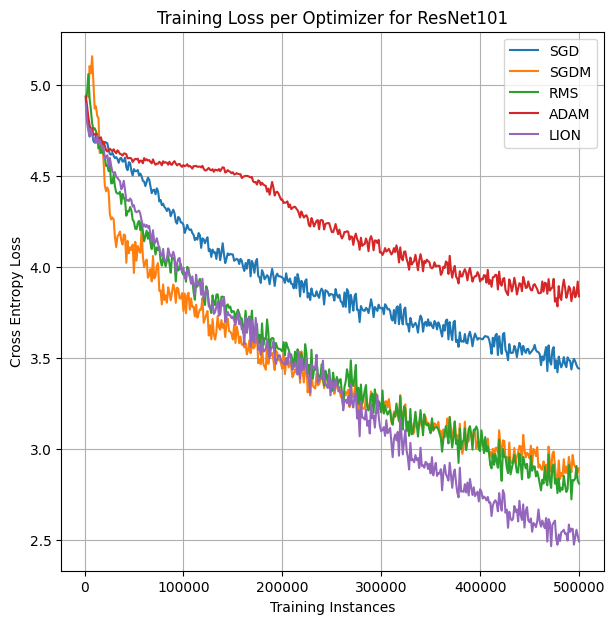

In [33]:
#Plot the training loss for each optimizer
fig, axs = plt.subplots(figsize=(7,7))
[axs.plot(a['trained_examples'], a['train_loss']) for a in results101]
axs.legend(optimizers)
axs.set_xlabel('Training Instances')
axs.set_ylabel('Cross Entropy Loss')
axs.grid()
axs.set_title("Training Loss per Optimizer for ResNet101")
fig.show()

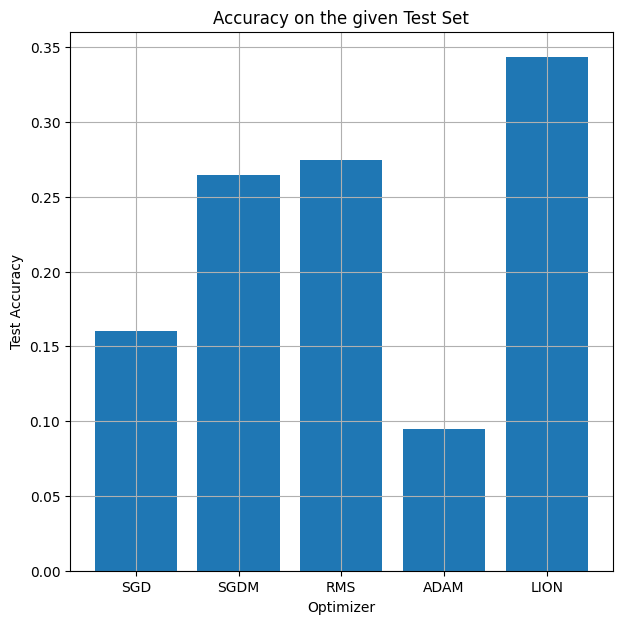

In [34]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(x=optimizers, height=[a['acc'] for a in results101])
axs.set_xlabel('Optimizer')
axs.set_ylabel('Test Accuracy')
axs.grid()
axs.set_title("Accuracy on the given Test Set")
fig.show()

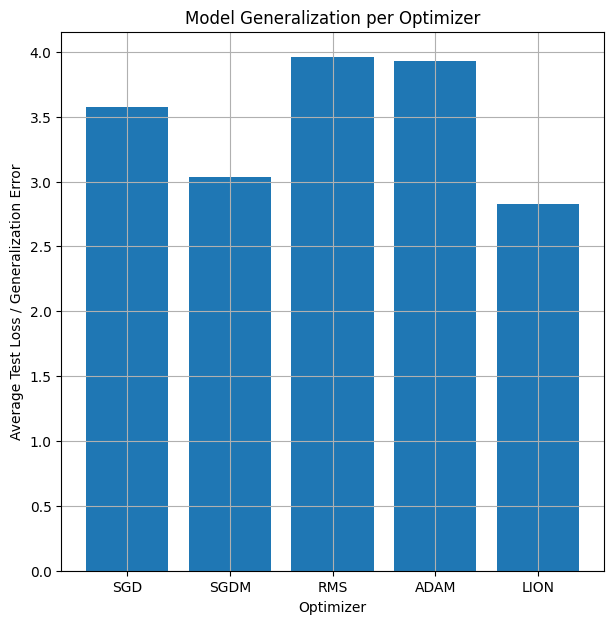

In [35]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(x=optimizers, height=[a['test_loss'] for a in results101])
axs.set_xlabel('Optimizer')
axs.set_ylabel('Average Test Loss / Generalization Error')
axs.grid()
axs.set_title("Model Generalization per Optimizer")
fig.show()

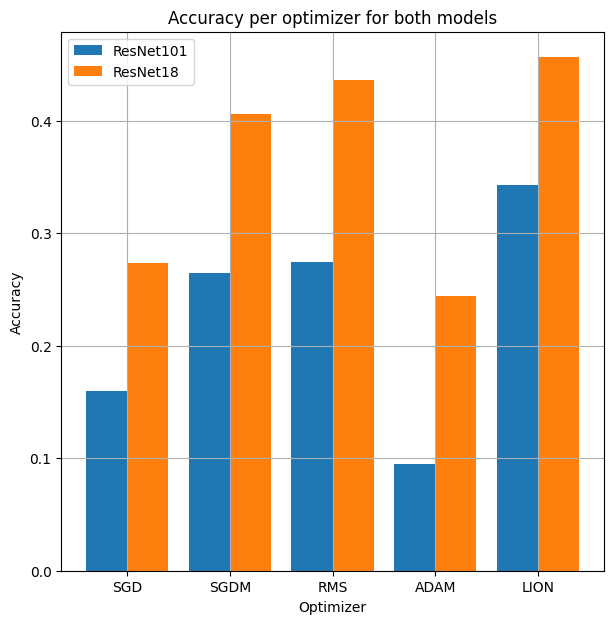

In [36]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(np.arange(len(optimizers)), [a['acc'] for a in results101], label='ResNet101', width=0.4)
axs.bar(np.arange(len(optimizers)) + 0.4, [a['acc'] for a in results18], label='ResNet18', width=0.4)
axs.set_xticks(np.arange(len(optimizers)) + 0.4 / 2, optimizers)
axs.set_xlabel('Optimizer')
axs.set_ylabel('Accuracy')
axs.grid()
axs.set_title("Accuracy per optimizer for both models")
axs.legend()
fig.show()

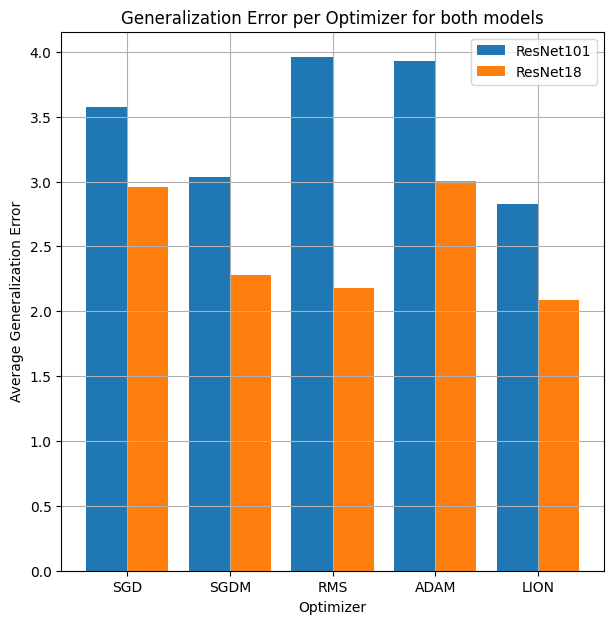

In [37]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(np.arange(len(optimizers)), [a['test_loss'] for a in results101], label='ResNet101', width=0.4)
axs.bar(np.arange(len(optimizers)) + 0.4, [a['test_loss'] for a in results18], label='ResNet18', width=0.4)
axs.set_xticks(np.arange(len(optimizers)) + 0.4 / 2, optimizers)
axs.set_xlabel('Optimizer')
axs.set_ylabel('Average Generalization Error')
axs.grid()
axs.set_title("Generalization Error per Optimizer for both models")
axs.legend()
fig.show()